In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [4]:
data = pd.read_csv('../5-data/trade_20181127.csv')
data.head()

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
0,2018-11-27D00:00:48.596462000,ADAZ18,Buy,2000,0.000009,PlusTick,2733acfb-a7b8-671a-3c6c-3752776d74b7,1892000,2000.0,0.018920
1,2018-11-27D00:00:55.302669000,ADAZ18,Buy,187,0.000009,ZeroPlusTick,afbd5ecc-1a2a-a8f6-3978-301e6033d4ec,176902,187.0,0.001769
2,2018-11-27D00:00:57.746560000,ADAZ18,Sell,5132,0.000009,MinusTick,dc29808a-1580-8e19-0fd0-5fa9dd4161f6,4849740,5132.0,0.048497
3,2018-11-27D00:01:01.173633000,ADAZ18,Buy,38000,0.000009,PlusTick,42887b1f-9be2-1f93-dc57-79d9fdda9e95,35948000,38000.0,0.359480
4,2018-11-27D00:01:02.777865000,ADAZ18,Buy,300,0.000009,ZeroPlusTick,5344ff0a-3e4b-fa7e-248a-bebaea178ebf,283800,300.0,0.002838


In [11]:
data = pd.concat([data, pd.read_csv('../5-data/trade_20181128.csv')]) # add a few more days
data = pd.concat([data, pd.read_csv('../5-data/trade_20181129.csv')])

In [12]:
data = data[data.symbol == 'XBTUSD']
# timestamp parsing
data['timestamp'] = data.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [13]:
data.head()

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
218349,2018-11-27 00:00:03.851282,XBTUSD,Buy,10,3724.5,ZeroPlusTick,538c244f-a1a9-61db-da2e-6db7b76e7507,268490,0.002685,10.0
218350,2018-11-27 00:00:04.250260,XBTUSD,Buy,20,3724.5,ZeroPlusTick,c50cf101-1c0d-445f-42c4-fc5339641968,536980,0.005370,20.0
218351,2018-11-27 00:00:04.250260,XBTUSD,Buy,480,3724.5,ZeroPlusTick,b71da1f1-b76e-c1e5-59ab-765438000186,12887520,0.128875,480.0
218352,2018-11-27 00:00:04.255471,XBTUSD,Buy,1000,3724.5,ZeroPlusTick,f7741936-b74c-844b-5023-a85712fe819e,26849000,0.268490,1000.0
218353,2018-11-27 00:00:04.262041,XBTUSD,Buy,1000,3724.5,ZeroPlusTick,9f5d581b-0eef-4dcd-16a2-019488ec38b8,26849000,0.268490,1000.0


In [14]:
def compute_vwap(df):
    q = df['foreignNotional']
    p = df['price']
    vwap = np.sum(p * q) / np.sum(q)
    df['vwap'] = vwap
    return df

data_timeidx   = data.set_index('timestamp')
data_time_grp  = data_timeidx.groupby(pd.Grouper(freq='15Min'))
num_time_bars  = len(data_time_grp) # comes in handy later
data_time_vwap = data_time_grp.apply(compute_vwap)

In [22]:
data_time_vwap

symbol side  size   price   
timestamp           timestamp                                               
2018-11-27 00:00:00 2018-11-27 00:00:03.851282  XBTUSD  Buy    10  3724.5  \
                    2018-11-27 00:00:04.250260  XBTUSD  Buy    20  3724.5   
                    2018-11-27 00:00:04.250260  XBTUSD  Buy   480  3724.5   
                    2018-11-27 00:00:04.255471  XBTUSD  Buy  1000  3724.5   
                    2018-11-27 00:00:04.262041  XBTUSD  Buy  1000  3724.5   
...                                                ...  ...   ...     ...   
2018-11-29 23:45:00 2018-11-29 23:59:58.789769  XBTUSD  Buy   100  4242.0   
                    2018-11-29 23:59:58.789769  XBTUSD  Buy  2500  4242.0   
                    2018-11-29 23:59:58.789769  XBTUSD  Buy  4280  4242.0   
                    2018-11-29 23:59:58.870162  XBTUSD  Buy   420  4242.0   
                    2018-11-29 23:59:58.870162  XBTUSD  Buy   180  4242.0   

                                               tickDirection   
timestamp           timestamp                                  
2018-11-27 00:00:00 2018-11-27 00:00:03.851282  ZeroPlusTick  \
                    2018-11-27 00:00:04.250260  ZeroPlusTick   
                    2018-11-27 00:00:04.250260  ZeroPlusTick   
                    2018-11-27 00:00:04.255471  ZeroPlusTick   
                    2018-11-27 00:00:04.262041  ZeroPlusTick   
...                                                      ...   
2018-11-29 23:45:00 2018-11-29 23:59:58.789769  ZeroPlusTick   
                    2018-11-29 23:59:58.789769  ZeroPlusTick   
                    2018-11-29 23:59:58.789769  ZeroPlusTick   
                    2018-11-29 23:59:58.870162  ZeroPlusTick   
                    2018-11-29 23:59:58.870162  ZeroPlusTick   

                                                                          trdMatchID   
timestamp           timestamp                                                          
2018-11-27 00:00:00 2018-11-27 00:00:03.851282  538c244f-a1a9-61db-da2e-6db7b76e7507  \
                    2018-11-27 00:00:04.250260  c50cf101-1c0d-445f-42c4-fc5339641968   
                    2018-11-27 00:00:04.250260  b71da1f1-b76e-c1e5-59ab-765438000186   
                    2018-11-27 00:00:04.255471  f7741936-b74c-844b-5023-a85712fe819e   
                    2018-11-27 00:00:04.262041  9f5d581b-0eef-4dcd-16a2-019488ec38b8   
...                                                                              ...   
2018-11-29 23:45:00 2018-11-29 23:59:58.789769  84a0947d-b053-44d1-1673-ba5bdc1156b5   
                    2018-11-29 23:59:58.789769  5cdc04f4-a709-eebb-b6ea-447e861fe773   
                    2018-11-29 23:59:58.789769  57bef9c0-d84d-8277-c797-2d9191eddf1e   
                    2018-11-29 23:59:58.870162  0a56f7c9-1abb-343a-c1ab-4291b3a5e7d4   
                    2018-11-29 23:59:58.870162  1ce9af94-42ae-e0e3-a6c0-bfcabcc7e218   

                                                grossValue  homeNotional   
timestamp           timestamp                                              
2018-11-27 00:00:00 2018-11-27 00:00:03.851282      268490      0.002685  \
                    2018-11-27 00:00:04.250260      536980      0.005370   
                    2018-11-27 00:00:04.250260    12887520      0.128875   
                    2018-11-27 00:00:04.255471    26849000      0.268490   
                    2018-11-27 00:00:04.262041    26849000      0.268490   
...                                                    ...           ...   
2018-11-29 23:45:00 2018-11-29 23:59:58.789769     2357400      0.023574   
                    2018-11-29 23:59:58.789769    58935000      0.589350   
                    2018-11-29 23:59:58.789769   100896720      1.008967   
                    2018-11-29 23:59:58.870162     9901080      0.099011   
                    2018-11-29 23:59:58.870162     4243320      0.042433   

                                                foreignNotional         vwap  


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (288, 2) + inhomogeneous part.

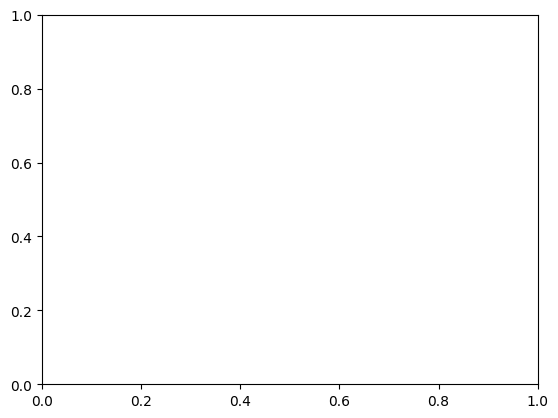

In [17]:
plt.plot(data_time_grp, data_time_vwap)